### importing necessary libraries

In [80]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable


from sklearn.impute import SimpleImputer



### Loading dataset

In [81]:
global_dataset = pd.read_csv('/home/shirleen/Documents/gloal_co2_emissions_analysis/CO2+Emissions (1)/visualizing_global_co2_data.csv')
global_dataset

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795
50596,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.112,0.001,0.001,0.002,0.0,NaN,NaN,1.006,9.481


### Handling missing values

In [82]:
missing_values = global_dataset.isnull().any(axis=1).sum()
missing_values


49364

In [83]:

# Separate numeric and non-numeric columns
numeric_columns = global_dataset.select_dtypes(include=['number']).columns
non_numeric_columns = global_dataset.select_dtypes(exclude=['number']).columns

# Impute numeric columns with the mean
global_dataset[numeric_columns] = global_dataset[numeric_columns].fillna(global_dataset[numeric_columns].mean())

# Impute non-numeric columns with the most frequent value (mode)
imputer = SimpleImputer(strategy='most_frequent')
global_dataset[non_numeric_columns] = imputer.fit_transform(global_dataset[non_numeric_columns])

# Display the DataFrame with filled-in values
global_dataset



,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,2.677586e+11,8.392491,0.063958,380.237549,5.703529,20.492413,...,20.6743,2.190116,0.002956,0.006886,0.010069,0.000497,771.485168,748.578502,-7.518768,20.623119
1,Afghanistan,1851,AFG,3767956.0,2.677586e+11,8.392491,0.063958,380.237549,5.703529,20.492413,...,20.6743,0.165000,0.000000,0.000000,0.000000,0.000000,771.485168,748.578502,-7.518768,20.623119
2,Afghanistan,1852,AFG,3783940.0,2.677586e+11,8.392491,0.063958,380.237549,5.703529,20.492413,...,20.6743,0.164000,0.000000,0.000000,0.000000,0.000000,771.485168,748.578502,-7.518768,20.623119
3,Afghanistan,1853,AFG,3800954.0,2.677586e+11,8.392491,0.063958,380.237549,5.703529,20.492413,...,20.6743,0.164000,0.000000,0.000000,0.000000,0.000000,771.485168,748.578502,-7.518768,20.623119
4,Afghanistan,1854,AFG,3818038.0,2.677586e+11,8.392491,0.063958,380.237549,5.703529,20.492413,...,20.6743,0.163000,0.000000,0.000000,0.000000,0.000000,771.485168,748.578502,-7.518768,20.623119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469000,0.032000,9.596000,-0.937000,-8.899000,...,20.6743,0.114000,0.001000,0.001000,0.002000,0.000000,115.590000,28.300000,0.910000,9.486000
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558000,0.037000,11.795000,2.199000,22.920000,...,20.6743,0.114000,0.001000,0.001000,0.002000,0.000000,118.220000,30.830000,0.771000,6.537000
50595,Zimbabwe,2019,ZWE,15354606.0,2.677586e+11,0.570000,0.037000,11.115000,-0.681000,-5.772000,...,20.6743,0.113000,0.001000,0.001000,0.002000,0.000000,117.960000,30.530000,0.978000,8.795000
50596,Zimbabwe,2020,ZWE,15669663.0,2.677586e+11,0.570000,0.036000,10.608000,-0.507000,-4.559000,...,20.6743,0.112000,0.001000,0.001000,0.002000,0.000000,771.485168,748.578502,1.006000,9.481000


### Finding out which countries are the largest contributors of C02

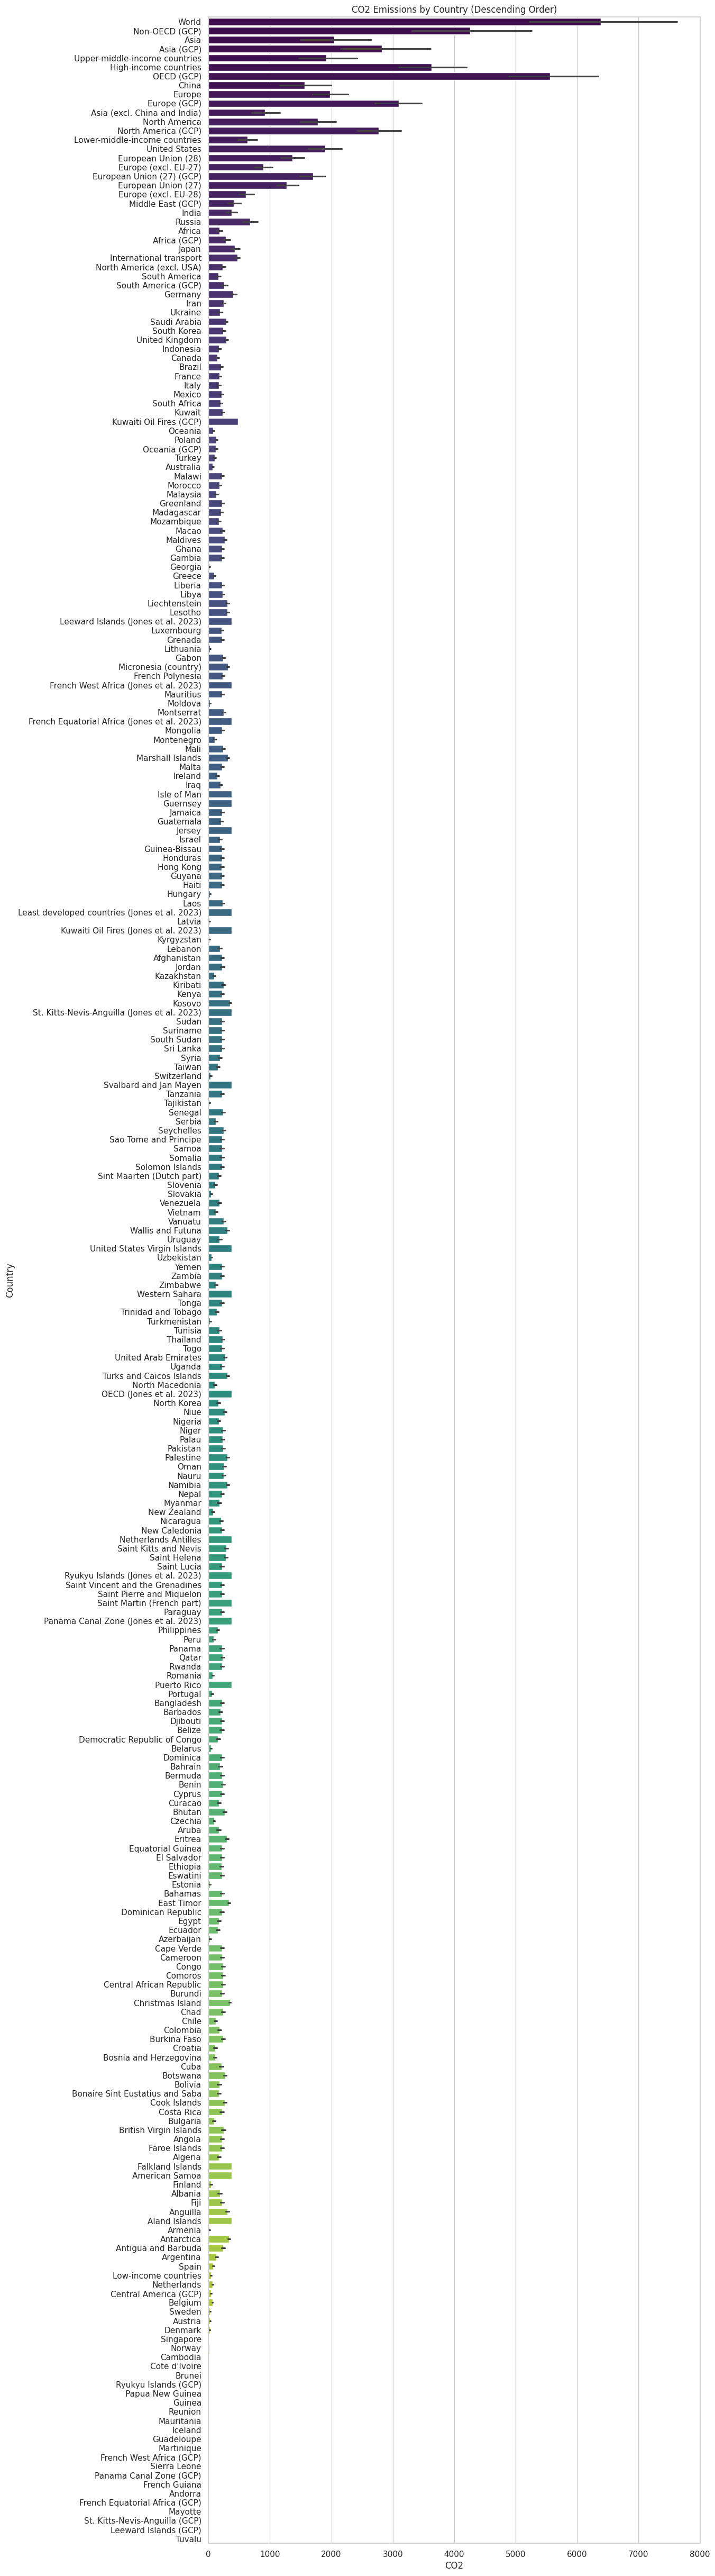

In [84]:
selected_columns = global_dataset[['country', 'co2']]

# Sort by 'co2' in descending order
sorted_data = selected_columns.sort_values(by='co2', ascending=False)

# Set the plotting style (optional)
sns.set_theme(style="whitegrid")

# Create a spacious horizontal bar plot using Seaborn
plt.figure(figsize=(12, 62))  # Adjust the figure size for a spacious layout
sns.barplot(x='co2', y='country', data=sorted_data, palette='viridis', hue='country', dodge=False, orient='h')
plt.xlabel('CO2')
plt.ylabel('Country')
plt.title('CO2 Emissions by Country (Descending Order)')
plt.show()



### Convert all fields with “Co2” in their name to be Number (Whole) data type and change them to be continuous measure



In [85]:
co2_columns = [col for col in global_dataset.columns if 'CO2' in col]

# Convert identified columns to Number (Whole) data type
global_dataset[co2_columns] = global_dataset[co2_columns].astype('int')

# Display the updated DataFrame information
global_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50598 entries, 0 to 50597
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50598 non-null  object 
 1   year                                       50598 non-null  int64  
 2   iso_code                                   50598 non-null  object 
 3   population                                 50598 non-null  float64
 4   gdp                                        50598 non-null  float64
 5   cement_co2                                 50598 non-null  float64
 6   cement_co2_per_capita                      50598 non-null  float64
 7   co2                                        50598 non-null  float64
 8   co2_growth_abs                             50598 non-null  float64
 9   co2_growth_prct                            50598 non-null  float64
 10  co2_including_luc     

### Create a new integer type parameter named Top N with a default value of 10

In [86]:
# Create a new integer parameter named 'Top N' with a default value of 10
top_n = 10

# Get the top N rows based on the 'co2' column
top_n_rows = global_dataset.nlargest(top_n, 'co2')

# Display the top N rows
top_n_rows

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
50081,World,2021,AND,7.909295e+09,2.677586e+11,1672.592,0.211,37123.852,1859.764,5.274,...,100.0,100.0,0.415,1.113,1.611,0.083,771.485168,748.578502,0.000,0.0
50079,World,2019,AND,7.764951e+09,2.677586e+11,1617.507,0.208,37082.559,256.049,0.695,...,100.0,100.0,0.404,1.076,1.561,0.081,49758.230000,48116.559000,0.000,0.0
50078,World,2018,AND,7.683790e+09,1.136302e+14,1569.218,0.204,36826.508,729.772,2.022,...,100.0,100.0,0.399,1.058,1.536,0.079,49368.039000,47980.469000,-0.004,-0.0
50077,World,2017,AND,7.599822e+09,1.104307e+14,1507.923,0.198,36096.738,572.547,1.612,...,100.0,100.0,0.394,1.039,1.511,0.078,48251.879000,47031.820000,0.004,0.0
50074,World,2014,AND,7.339014e+09,2.677586e+11,1499.912,0.204,35577.535,258.335,0.731,...,100.0,100.0,0.380,0.985,1.439,0.074,46881.781000,46143.840000,-0.004,-0.0
50075,World,2015,AND,7.426597e+09,2.677586e+11,1444.436,0.194,35558.566,-18.969,-0.053,...,100.0,100.0,0.385,1.003,1.463,0.075,46871.770000,46085.309000,-0.004,-0.0
50076,World,2016,AND,7.513474e+09,1.071343e+14,1487.617,0.198,35524.191,-34.378,-0.097,...,100.0,100.0,0.389,1.021,1.487,0.077,47531.680000,46264.070000,0.004,0.0
50073,World,2013,AND,7.250593e+09,2.677586e+11,1444.086,0.199,35319.203,312.930,0.894,...,100.0,100.0,0.375,0.966,1.414,0.073,46238.609000,45850.352000,0.000,0.0
50080,World,2020,AND,7.840953e+09,2.677586e+11,1637.537,0.209,35264.086,-1818.472,-4.904,...,100.0,100.0,0.410,1.094,1.585,0.082,771.485168,748.578502,0.000,0.0
50072,World,2012,AND,7.161698e+09,2.677586e+11,1384.570,0.193,35006.270,519.258,1.506,...,100.0,100.0,0.370,0.948,1.390,0.072,45597.141000,45164.500000,-0.004,-0.0


#### Create a line chart showing the % of total share of CO2 by year for the top 10 countries using your TOP N parameter

/tmp/ipykernel_4666/3899125042.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_data['PercentShare'] = top_countries_data.groupby('year')['co2'].transform(lambda x: (x / x.sum()) * 100)


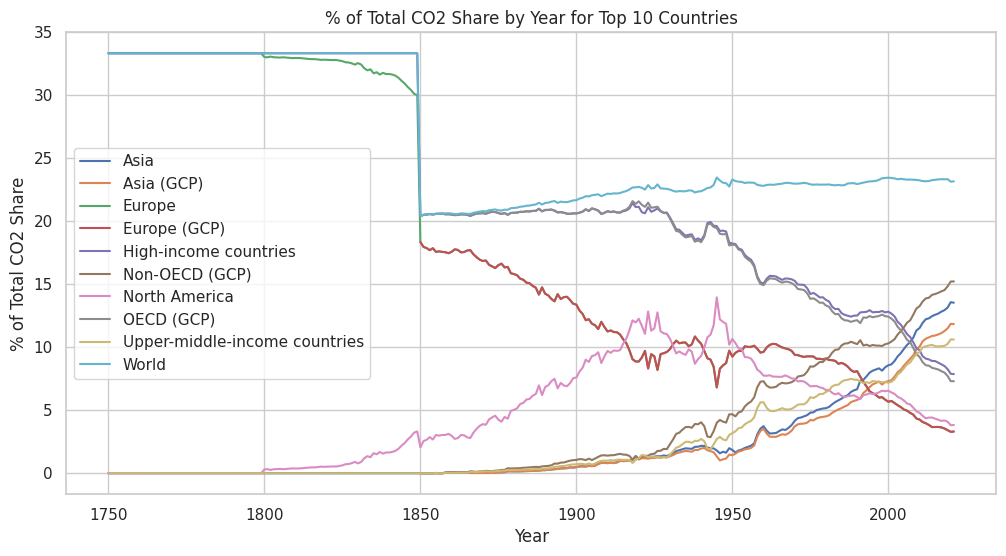

In [87]:
sns.set_theme(style="whitegrid")


# Create a new integer parameter named 'Top N' with a default value of 10
top_n = 10

# Group by 'Country' and 'Year' and sum the CO2 emissions
grouped_data = global_dataset.groupby(['country', 'year'])['co2'].sum().reset_index()

# Get the top N countries based on total CO2 emissions
top_countries = grouped_data.groupby('country')['co2'].sum().nlargest(top_n).index

# Filter the data for the top N countries
top_countries_data = grouped_data[grouped_data['country'].isin(top_countries)]

# Calculate the % of total share of CO2 by year
top_countries_data['PercentShare'] = top_countries_data.groupby('year')['co2'].transform(lambda x: (x / x.sum()) * 100)

# Plot the line chart
plt.figure(figsize=(12, 6))
for country in top_countries_data['country'].unique():
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['PercentShare'], label=country)

plt.xlabel('Year')
plt.ylabel('% of Total CO2 Share')
plt.title(f'% of Total CO2 Share by Year for Top {top_n} Countries')
plt.legend()
plt.show()


#### Create a map at country level using Co2 Per Capita for the year 2021 only

/tmp/ipykernel_4666/3157415104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['CO2_Per_Capita'] = data_2021['co2'] / data_2021['population']
/tmp/ipykernel_4666/3157415104.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


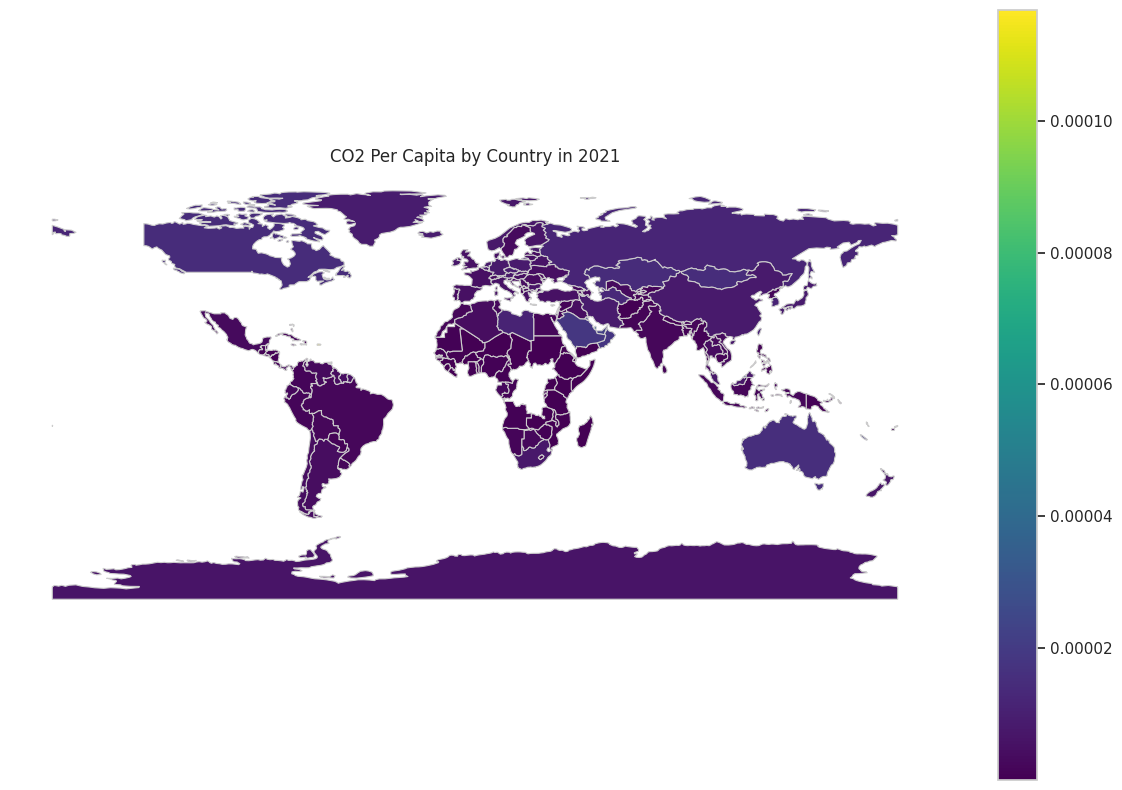

In [88]:

# Filter the data for the year 2021
data_2021 = global_dataset[global_dataset['year'] == 2021]

# Calculate CO2 per capita
data_2021['CO2_Per_Capita'] = data_2021['co2'] / data_2021['population']

# Load a world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the CO2 per capita data for 2021
merged_data = world.merge(data_2021, left_on='name', right_on='country', how='left')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='CO2_Per_Capita', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('CO2 Per Capita by Country in 2021')
ax.axis('off')
plt.show()

##### Create a scatter plot comparing Co2 and population at country level, with bubbles sized by Temperature Change From Co2 for the year 2021 (BONUS: Add a linear regression trend line)

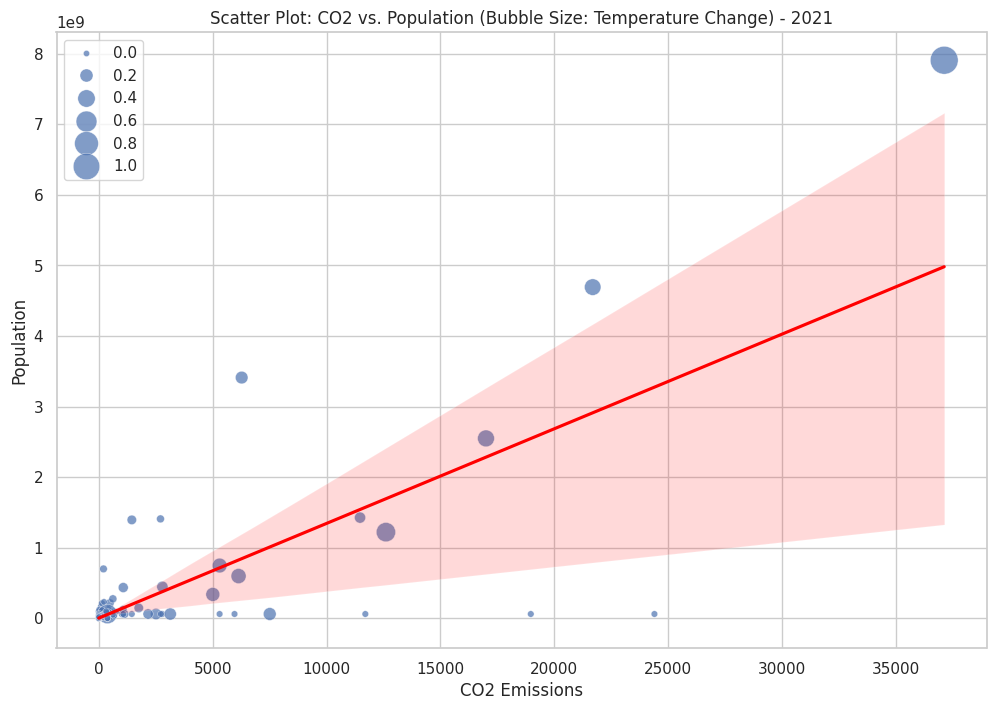

In [89]:
# Filter the data for the year 2021
data_2021 = global_dataset[global_dataset['year'] == 2021]

# Create a scatter plot with bubbles sized by Temperature Change From CO2
plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(x='co2', y='population', size='temperature_change_from_co2', data=data_2021, alpha=0.7, sizes=(20, 400))

# Add a linear regression trend line
sns.regplot(x='co2', y='population', data=data_2021, scatter=False, ax=scatterplot, color='red', line_kws={'label':'Linear Regression'})

# Customize the plot
plt.title('Scatter Plot: CO2 vs. Population (Bubble Size: Temperature Change) - 2021')
plt.xlabel('CO2 Emissions')
plt.ylabel('Population')
plt.legend()

# Display the plot
plt.show()